# Main Metrics

This notebook:

1) Loads a list of stories as input

2) Computes following ratios and indices

* signed (%)
* digital first (0 to 100)
* international (%)
* varied (0 to 100)
* fast (0 to 100)

3) Exports data for the selected time frame

© Paul Ronga under Apache-2 Licence (see LICENCE.txt).

In [1]:
import pandas as pd
import requests
from IPython.display import HTML
import json
from bs4 import BeautifulSoup
import datetime

In [4]:
medias = pd.read_csv('df/media_list.csv', usecols=['media_id', 'Name'])

In [5]:
df = pd.read_csv('df/stories.csv')
# df = pd.read_csv('df/stories-minutes-day.csv')

## Select the time frame

In [25]:
# Get and check the last week's time frame

today = datetime.datetime.now()
delta_days = (today.weekday() + 1) % 7
today - datetime.timedelta(7 + delta_days)


last_sunday = today - datetime.timedelta(delta_days)
last_monday = last_sunday - datetime.timedelta(6)
print('Last Sunday should be {}, {} days ago.'.format(last_sunday.strftime('%B %d') , delta_days ))
print('The previous Monday should be {}.'.format(last_monday.strftime('%B %d') , delta_days ))

Last Sunday should be June 17, 6 days ago.
The previous Monday should be June 11.


In [31]:
# Date index
df['time_start'] = pd.to_datetime(df['time_start'])
df['time_end'] = pd.to_datetime(df['time_end'])
df.index = df['time_start']

In [32]:
start_timestamp = last_monday.strftime('%Y-%m-%d')
end_timestamp = last_sunday.strftime('%Y-%m-%d')
df[start_timestamp:end_timestamp].shape

(1322, 19)

In [33]:
df = df[start_timestamp:end_timestamp].copy()

In [404]:
df['2018-06-03':'2018-06-09'].shape

(1057, 21)

In [405]:
df.shape

(2157, 21)

In [406]:
# 2 semaines
df['2018-05-27':'2018-06-09'].shape

(2157, 21)

In [407]:
df = df['2018-05-27':'2018-06-09'].copy()

In [8]:
df[df['link'] != df['link']]

,id,title,absolute_url,time_start,time_end,minutes,delta_str,link,media,media_id,server_time,author,story_time,agency,editor,heading,domains,paywall,hide
time_start,,,,,,,,,,,,,,,,,,,
2018-06-11 10:03:00,12909,Erreur 502 de la homepage,https://www.lematin.ch/,2018-06-11 10:03:00,2018-06-11 10:06:00,3,3’,NaN,https://www.lematin.ch/,25,0.0235,Christine Talos,0.1386,0,1,NaN,NaN,0,0
2018-06-11 10:06:00,12910,Erreur 502 de la homepage,https://www.lematin.ch/,2018-06-11 10:06:00,2018-06-11 10:09:00,3,3’,NaN,https://www.lematin.ch/,25,0.0295,Christine Talos,0.1438,0,1,NaN,NaN,0,0
2018-06-11 10:09:00,12911,Erreur 502 de la homepage,https://www.lematin.ch/,2018-06-11 10:09:00,2018-06-11 10:12:00,3,3’,NaN,https://www.lematin.ch/,25,0.0349,Christine Talos,0.0806,0,1,NaN,NaN,0,0
2018-06-11 10:12:00,12912,Erreur 502 de la homepage,https://www.lematin.ch/,2018-06-11 10:12:00,2018-06-11 10:15:00,3,3’,NaN,https://www.lematin.ch/,25,0.0292,Christine Talos,0.0936,0,1,NaN,NaN,0,0
2018-06-11 10:15:00,12913,Erreur 502 de la homepage,https://www.lematin.ch/,2018-06-11 10:15:00,2018-06-11 10:18:00,3,3’,NaN,https://www.lematin.ch/,25,0.0259,Christine Talos,0.1473,0,1,NaN,NaN,0,0
2018-06-11 14:09:00,12976,Erreur 502 de la homepage,https://www.lematin.ch/,2018-06-11 14:09:00,NaT,0,NaN,NaN,https://www.lematin.ch/,25,0.0283,Evelyne Emeri,0.0883,0,1,NaN,NaN,0,0
2018-06-11 16:48:00,13005,Erreur 502 de la homepage,https://www.lematin.ch/,2018-06-11 16:48:00,2018-06-11 16:51:00,3,3’,NaN,https://www.lematin.ch/,25,0.0281,Trinidad Barleycorn,0.0934,0,1,NaN,NaN,0,0
2018-06-12 00:00:00,13080,Erreur 503 de la homepage,https://www.20min.ch/ro/,2018-06-12 00:00:00,2018-06-12 00:03:00,3,3’,NaN,https://www.20min.ch/ro/,24,3.9833,NaN,0.9078,0,0,NaN,NaN,0,0


In [9]:
df = df[df['link'] == df['link']].copy()
df = df[df['link'] != '#'].copy()

In [10]:
df.shape

(1028, 19)

In [410]:
# 1 semaine
# df = df['2018-06-03':'2018-06-09'].copy()

## Retour à un index numérique

In [13]:
df.index = df.id

In [14]:
df[df.index.duplicated()]

,id,title,absolute_url,time_start,time_end,minutes,delta_str,link,media,media_id,server_time,author,story_time,agency,editor,heading,domains,paywall,hide
id,,,,,,,,,,,,,,,,,,,


In [15]:
df[df.time_start.duplicated()].shape

(275, 19)

In [24]:
# On retire Konbini Suisse et France
df = df[df['media_id'] < 34].copy()
medias = medias[medias['media_id'] < 34].copy()

# Editeur

In [21]:
def getEditorRatio(_group):
    if len(_group) == 0:
        print('Error: length is 0')
        return False
    print('Editor ratio for {}: {} / {}'.format(_group['media'].values[0], len(_group[_group['editor'] == 1]), len(_group)))
    return len(_group[_group['editor'] == 1]) / len(_group)

In [18]:
# La Liberté
for i, row in df[df['media_id'] == 32].iterrows():
    if row['link'].split('/')[1] == 'news-agence':
        df.at[i, 'agency'] = 1
    else:
        df.at[i, 'editor'] = 1

In [19]:
# La Liberté: news-agence = agence
df[df['media_id'] == 32][:5]

,id,title,absolute_url,time_start,time_end,minutes,delta_str,link,media,media_id,server_time,author,story_time,agency,editor,heading,domains,paywall,hide
id,,,,,,,,,,,,,,,,,,,
12882,12882,Fribourg Olympic triple la mise,https://www.laliberte.ch/news/sports/basketbal...,2018-06-11 06:48:00,2018-06-11 11:51:00,303,5h03,/news/sports/basketball/fribourg-olympic-tripl...,https://www.laliberte.ch/,32,29.5923,NaN,0.6001,0,1,NaN,NaN,1,0
12937,12937,La Poste: décharge restreinte du Conseil fédéral,https://www.laliberte.ch/news-agence/detail/la...,2018-06-11 11:51:00,2018-06-11 12:12:00,21,21’,/news-agence/detail/la-poste-decharge-restrein...,https://www.laliberte.ch/,32,0.7513,NaN,0.0530,1,0,NaN,NaN,0,0
12947,12947,Les salaires réels ont reculé l'an dernier,https://www.laliberte.ch/news-agence/detail/le...,2018-06-11 12:12:00,2018-06-11 12:18:00,6,6’,/news-agence/detail/les-salaires-reels-ont-rec...,https://www.laliberte.ch/,32,0.5339,NaN,0.4725,1,0,NaN,NaN,0,0
12949,12949,Suspension de la direction de CarPostal,https://www.laliberte.ch/news-agence/detail/su...,2018-06-11 12:18:00,2018-06-12 06:57:00,1119,18h39,/news-agence/detail/suspension-de-la-direction...,https://www.laliberte.ch/,32,7.4015,NaN,0.3821,1,0,NaN,NaN,0,0
13111,13111,Trump et Kim entament leur sommet par une poig...,https://www.laliberte.ch/news-agence/detail/tr...,2018-06-12 06:57:00,2018-06-12 07:03:00,6,6’,/news-agence/detail/trump-et-kim-entament-leur...,https://www.laliberte.ch/,32,0.0618,NaN,0.4054,1,0,NaN,NaN,0,0


In [22]:
medias['signed'] = -1
for i, row in medias.iterrows():
    print(i)
    group = df[df['media_id'] == row['media_id']]
    editorRatio = getEditorRatio(group)
    print(editorRatio, round(editorRatio * 100))
    medias.at[i, 'signed'] = round(editorRatio * 100)

0
Editor ratio for https://www.tdg.ch/: 32 / 66
0.48484848484848486 48
1
Editor ratio for https://www.24heures.ch: 17 / 39
0.4358974358974359 44
2
Editor ratio for https://www.letemps.ch: 23 / 49
0.46938775510204084 47
3
Editor ratio for https://www.lemonde.fr: 47 / 80
0.5875 59
4
Editor ratio for https://www.rts.ch/info/: 0 / 92
0.0 0
5
Editor ratio for https://www.20min.ch/ro/: 22 / 60
0.36666666666666664 37
6
Editor ratio for https://www.lematin.ch/: 27 / 93
0.2903225806451613 29
7
Editor ratio for https://www.mediapart.fr: 13 / 18
0.7222222222222222 72
8
Editor ratio for https://www.lefigaro.fr/: 30 / 58
0.5172413793103449 52
9
Editor ratio for https://www.liberation.fr/: 51 / 66
0.7727272727272727 77
10
Editor ratio for https://www.lacote.ch/: 24 / 44
0.5454545454545454 55
11
Editor ratio for https://www.arcinfo.ch/: 19 / 42
0.4523809523809524 45
12
Editor ratio for https://www.lenouvelliste.ch/: 35 / 73
0.4794520547945205 48
13
Editor ratio for https://www.laliberte.ch/: 12 / 22


In [25]:
medias

,media_id,Nom,signed
0,19,La Tribune de Genève,48
1,20,24 heures,44
2,21,Le Temps,47
3,22,Le Monde,59
4,23,RTS info,0
5,24,20 minutes (ch),37
6,25,Le Matin,29
7,26,Mediapart,72
8,27,Le Figaro,52
9,28,Libération,77


# Rubrique

In [26]:
# Principe: au départ, on se concentre sur TG, LM, VQH, Le Temps
# Le Courrier viendra ensuite ?

def getHeading(_media_id, _link):
    url_parts = _link.split('/')

    # tg, vqh, lm        
    if _media_id in (19, 20, 25):
        return url_parts[1]
            
    # le temps
    elif _media_id == 21:
        if url_parts[1] == 'node':
            return 'longform'
        else:
            return url_parts[1]
    
    # le monde
    elif _media_id == 22:
        return url_parts[1]
    
    # rts info
    elif _media_id == 23:
        return url_parts[2]
    
    # mediapart
    elif _media_id == 26:
        return url_parts[2]
    
    # Libé
    elif _media_id == 28:
        if url_parts[1] in ['france', 'politiques']:
            return 'national'
        elif url_parts[1] == 'planete':
            return 'international'
        else:
            return url_parts[1]
    
    # 20 minutes
    elif _media_id == 24:
        if url_parts[2] != 'news':
            return url_parts[2]
            
        else:
            return url_parts[3]
        
    # le figaro (27): 3
    elif _media_id == 27:
        
        return url_parts[3]
    
    # La Côte, Le Nouvelliste, La Liberté
    elif _media_id in (29, 30, 31, 32):
        if url_parts[2] in ('valais', 'regions', 'canton'):
            return 'région'
        else:
            return url_parts[2]

    # Le Courrier    
    elif _media_id == 33:
        return ''
    
    else:
        print('Media', _media_id, 'not in list missing')
        return 'missing' + str(_media_id)

In [28]:
df['heading'] = ''
for i, row in df.iterrows():
    if row['media_id'] != 33: # Le Courrier: manuel
        df.at[i, 'heading'] = getHeading(row['media_id'], row['link'])
    else:
        print('C', end='')

CCCCCCCCCCCCC

In [32]:
# Add heading for Le Courrier
print("We’ll get {} missing headings for “Le Courrier”".format( df[df['media_id'] == 33].shape[0]) )

We’ll add 13 headings for Le Courrier


In [33]:
for i, row in df[df['media_id'] == 33].iterrows():
    print(row['absolute_url'])
    ua_headers = {'User-Agent': 'Internet Explorer'}    
    response = requests.get(row['absolute_url'], headers=ua_headers)
    if not response:
        print('Error loading', row['absolute_url'])
    elif response.status_code != 200:
        print('Error {} when loading {}'.format( response.status_code, row['url'] ) )
    doc = BeautifulSoup(response.content, 'html.parser')    
    tags = doc.select('.c-Article-theme .c-Article-breadcrumb-tagsLink')
    print(tags)
    if len(tags) > 0:
        tag = tags[0]
        print(tag.string, tag.get('href'))
        df.at[i, 'heading'] = tag.string
    else:
        print('No tag found')
    print()

https://lecourrier.ch/2018/06/10/g7-un-sommet-dhypocrisie/ 
[<a class="c-Article-breadcrumb-tagsLink" href="/rubrique/international/">International</a>]
International /rubrique/international/

https://lecourrier.ch/2018/06/11/je-mene-campagne-depuis-ma-cellule/ 
[<a class="c-Article-breadcrumb-tagsLink" href="/theme/solidarite/">Solidarité</a>]
Solidarité /theme/solidarite/

https://lecourrier.ch/2018/06/11/le-chef-de-cabinet-epargne/ 
[<a class="c-Article-breadcrumb-tagsLink" href="/theme/geneve/">Genève</a>]
Genève /theme/geneve/

https://lecourrier.ch/2018/06/12/haine-gratuite-et-invisibilisee/ 
[]
No tag found

https://lecourrier.ch/2018/06/12/haine-gratuite-et-invisible/ 
[<a class="c-Article-breadcrumb-tagsLink" href="/theme/neuchatel/">Neuchâtel</a>]
Neuchâtel /theme/neuchatel/

https://lecourrier.ch/2018/06/12/un-cours-climato-sceptique-a-calvin/ 
[<a class="c-Article-breadcrumb-tagsLink" href="/theme/geneve/">Genève</a>]
Genève /theme/geneve/

https://lecourrier.ch/2018/06/12/

In [34]:
df[df['media_id'] == 33]['heading'].value_counts()

Genève           4
Vaud             3
International    2
Suisse           1
Solidarité       1
Neuchâtel        1
                 1
Name: heading, dtype: int64

# minutes_day
Ajouter une colonne minutes_day ne comptant que les minutes du jour.
Même principe pour les minutes des heures à fort trafic: 7h-8h, 12h-13h

In [35]:
sevenAM = datetime.time(7, 0)
elevenPM = datetime.time(23, 0)

In [36]:
sevenAM.strftime('%H:%M'), elevenPM.strftime('%H:%M')

('07:00', '23:00')

In [37]:
df['minutes_day'] = 0

In [38]:
sevenAM = datetime.time(7, 0)
elevenPM = datetime.time(23, 0)

for i, row in df.iterrows():
    if row['time_end'] != row['time_end']: # NaT
        continue
    startTime = row['time_start'].time()
    endTime = row['time_end'].time()
    if startTime.hour < 7:
        startTime = sevenAM
    elif startTime.hour > 23:
        startTime = elevenPM
    if endTime.hour < 7:
        endTime = sevenAM
    elif endTime.hour > 23:
        endTime = elevenPM
        
    startDate = datetime.datetime.combine(row['time_start'].date(), startTime)
    endDate = datetime.datetime.combine(row['time_end'].date(), endTime)
    delta = endDate - startDate
    if delta != 0:
        df.at[i, 'minutes_day'] = round(delta.seconds / 60)
    else:
        df.at[i, 'minutes_day'] = 0

In [39]:
# Check the results
df[['time_start', 'time_end', 'minutes', 'minutes_day']]

,time_start,time_end,minutes,minutes_day
id,,,,
12873,2018-06-11 02:54:00,NaT,0,0
12875,2018-06-11 04:45:00,2018-06-11 05:15:00,30,0
12876,2018-06-11 05:15:00,2018-06-11 07:12:00,117,12
12877,2018-06-11 05:27:00,2018-06-11 08:39:00,192,99
12878,2018-06-11 06:12:00,2018-06-11 06:36:00,24,0
12879,2018-06-11 06:33:00,2018-06-11 11:06:00,273,246
12880,2018-06-11 06:36:00,2018-06-11 08:06:00,90,66
12881,2018-06-11 06:45:00,2018-06-11 07:03:00,18,3
12882,2018-06-11 06:48:00,2018-06-11 11:51:00,303,291


In [47]:
# Have a look at some absolute values

targetMedia = 22 # Le Monde

top_headings = df[df['media_id'] == targetMedia]['heading'].value_counts().head(2).index

top_sum = 0
for heading in top_headings:
    results = df[(df['media_id'] == targetMedia) & (df['heading'] == heading)]
    print(heading, len(results), results['minutes'].sum(), results['minutes_day'].sum())
    
    results_day = results[results['minutes_day'] != 0]
    print('Durée moyenne: {} minutes'.format( results_day['minutes_day'].sum() / len(results_day) ))
    
    top_sum += results['minutes_day'].sum()
    
print("Part des deux rubriques principales:", top_sum / df[(df['media_id'] == targetMedia)]['minutes_day'].sum())

mondial-2018 22 2430 2523
Durée moyenne: 114.68181818181819 minutes
europe 18 537 537
Durée moyenne: 29.833333333333332 minutes
Part des deux rubriques principales: 0.4495372410753636


In [49]:
# Valeurs absolues, en heures
for media_id in medias['media_id'].tolist():
    # Heures
    print(medias[medias['media_id'] == media_id]['Nom'].values[0])
    heading_times = df[df['media_id'] == media_id].groupby('heading')['minutes_day'].sum()//60
    print(heading_times.sort_values(ascending=False).head(10))

La Tribune de Genève
heading
geneve            47
monde             17
suisse            15
coupe-du-monde    13
economie           3
sports             2
culture            0
Name: minutes_day, dtype: int64
24 heures
heading
vaud-regions      56
sports            25
suisse            22
coupe-du-monde     7
monde              3
news               1
Name: minutes_day, dtype: int64
Le Temps
heading
monde        59
suisse       20
economie     17
opinions      4
culture       4
longform      3
lifestyle     3
societe       1
sport         0
sciences      0
Name: minutes_day, dtype: int64
Le Monde
heading
mondial-2018       42
international      26
les-decodeurs      14
asie-pacifique     12
europe              8
emmanuel-macron     2
economie            2
idees               1
sante               0
politique           0
Name: minutes_day, dtype: int64
RTS info
heading
monde            57
regions          31
suisse           13
economie          8
culture           2
sciences-tech     1
t

In [50]:
heading_times.std()

10.46308704332476

In [51]:
# Valeurs relatives
for media_id in medias['media_id'].tolist():
    # Heures
    theMedia = medias[medias['media_id'] == media_id]
    mediaSum = df[df['media_id'] == media_id]['minutes_day'].sum()
    print(theMedia['Nom'].values[0], 'total:', mediaSum)
    heading_times = (round(100 * df[df['media_id'] == media_id].groupby('heading')['minutes_day'].sum() / mediaSum)).to_frame()
    heading_times = heading_times[heading_times['minutes_day'] >= 5].copy()
    print('Dev', round(heading_times['minutes_day'].std()), 'top5',round(heading_times.sort_values('minutes_day', ascending=False).head().std()))
    
    #others = 100 - heading_times[heading_times['minutes_day'] >= 5]['minutes_day'].sum()
    #heading_times.loc['autres'] = {'minutes_day': others}
    #print(heading_times.sort_values('minutes_day', ascending=False).head(2)['minutes_day'].sum())



La Tribune de Genève total: 6069
Dev 16.0 top5 minutes_day    16.0
dtype: float64
24 heures total: 7059
Dev 17.0 top5 minutes_day    17.0
dtype: float64
Le Temps total: 6945
Dev 20.0 top5 minutes_day    20.0
dtype: float64
Le Monde total: 6807
Dev 12.0 top5 minutes_day    12.0
dtype: float64
RTS info total: 6909
Dev 19.0 top5 minutes_day    19.0
dtype: float64
20 minutes (ch) total: 6984
Dev 9.0 top5 minutes_day    8.0
dtype: float64
Le Matin total: 7053
Dev 13.0 top5 minutes_day    13.0
dtype: float64
Mediapart total: 7491
Dev 35.0 top5 minutes_day    35.0
dtype: float64
Le Figaro total: 6837
Dev 15.0 top5 minutes_day    16.0
dtype: float64
Libération total: 7182
Dev 17.0 top5 minutes_day    17.0
dtype: float64
La Côte total: 7113
Dev 32.0 top5 minutes_day    32.0
dtype: float64
Arcinfo total: 7227
Dev 21.0 top5 minutes_day    21.0
dtype: float64
Le Nouvelliste total: 6921
Dev 14.0 top5 minutes_day    14.0
dtype: float64
La Liberté total: 7224
Dev 22.0 top5 minutes_day    22.0
dtype: 

In [52]:
heading_times.sort_values('minutes_day', ascending=False).head(2)

,minutes_day
heading,
Genève,32.0
Suisse,17.0


In [53]:
def getVariedRatioByTop(_group):
    heading_times = (round(100 * _group.groupby('heading')['minutes_day'].sum() / _group['minutes_day'].sum())).to_frame()
    
    return 100 - round(heading_times.sort_values('minutes_day', ascending=False).head(2)['minutes_day'].sum())

In [54]:
def getVariedRatioByStd(_group):
    heading_times = (round(100 * _group.groupby('heading')['minutes_day'].sum() / _group['minutes_day'].sum())).to_frame()
    heading_times = heading_times[heading_times['minutes_day'] >= 5].copy()
    
    # print(heading_times.sort_values('minutes_day', ascending=False).head(2)['minutes_day'].sum())
    return 500 / round(heading_times.sort_values('minutes_day', ascending=False).head().std())

In [55]:
medias['varied'] = -1
medias['varied-2'] = -1
medias['varied-3'] = -1

for i, row in medias.iterrows():
    group = df[df['media_id'] == row['media_id']]
    medias.at[i, 'varied'] = (getVariedRatioByTop(group) + getVariedRatioByStd(group)) / 2
    medias.at[i, 'varied-2'] = getVariedRatioByStd(group)
    medias.at[i, 'varied-3'] = getVariedRatioByTop(group)

medias

,media_id,Nom,signed,varied,varied-2,varied-3
0,19,La Tribune de Genève,48,33,31,36
1,20,24 heures,44,30,29,31
2,21,Le Temps,47,28,25,32
3,22,Le Monde,59,40,41,39
4,23,RTS info,0,24,26,22
5,24,20 minutes (ch),37,56,62,50
6,25,Le Matin,29,41,38,45
7,26,Mediapart,72,11,14,9
8,27,Le Figaro,52,36,31,42
9,28,Libération,77,29,29,29


In [56]:
del medias['varied-2']
del medias['varied-3']

In [58]:
medias.to_csv('df/medias_rated_v1_11-15_juin.csv')

In [59]:
heading_times['heading'] = heading_times.index

In [60]:
import re
heading_times[heading_times.index.str.contains('international|monde', flags=re.IGNORECASE)]

,minutes_day,heading
heading,,
International,15.0,International


In [61]:
def getInternationalRatio(_group):
    heading_times = (round(100 * _group.groupby('heading')['minutes_day'].sum() / _group['minutes_day'].sum())).to_frame()
    # monde$ to avoid “coupe du monde au brésil”
    result = heading_times[heading_times.index.str.contains('international|monde$', flags=re.IGNORECASE)]
    print(*result.index.tolist())
    return result['minutes_day'].sum()

In [62]:
medias['international'] = -1

for i, row in medias.iterrows():
    group = df[(df['media_id'] == row['media_id'])]  #  & (df['editor'] == 1)
    medias.at[i, 'international'] = getInternationalRatio(group)
medias

coupe-du-monde monde
coupe-du-monde monde
monde
international
monde
monde
coupe-du-monde monde
international
international
international


monde
international
International


,media_id,Nom,signed,varied,international
0,19,La Tribune de Genève,48,33,30
1,20,24 heures,44,30,10
2,21,Le Temps,47,28,51
3,22,Le Monde,59,40,24
4,23,RTS info,0,24,50
5,24,20 minutes (ch),37,56,18
6,25,Le Matin,29,41,26
7,26,Mediapart,72,11,17
8,27,Le Figaro,52,36,45
9,28,Libération,77,29,20


In [217]:
df.to_csv('df/stories-minutes-day-v3.csv')

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

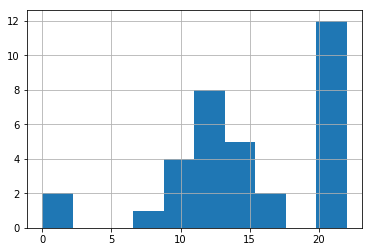

In [64]:
# Tribune de Genève
group = df[(df['media_id'] == 19) & (df['editor'] != 1)]
group['time_start'].dt.hour.hist()

In [65]:
df.index = df.time_start

In [66]:
# Matin 8h-15h vs soir 16h-23h?
# [Ou 9h-16h vs 17h-23h?]

In [69]:
def getDigitalFirstRatio(_group):
    _group = _group[(_group['time_start'].dt.hour > 7) & (_group['time_start'].dt.hour < 24) & (_group['editor'] == 1)]
    
    if len(_group) < 1:
        print('No signed stories found')
        return -1
    
    morning = _group[_group.index.hour < 16]
    evening = _group[_group.index.hour >= 16]
    
    return int( round( 100 * len(morning) / len(_group) ) )

In [70]:
medias['digitalfirst'] = -1

for i, row in medias.iterrows():
    group = df[(df['media_id'] == row['media_id'])]  #  & (df['editor'] == 1)
    medias.at[i, 'digitalfirst'] = getDigitalFirstRatio(group)
medias

No signed stories found


,media_id,Nom,signed,varied,international,digitalfirst
0,19,La Tribune de Genève,48,33,30,32
1,20,24 heures,44,30,10,33
2,21,Le Temps,47,28,51,65
3,22,Le Monde,59,40,24,71
4,23,RTS info,0,24,50,-1
5,24,20 minutes (ch),37,56,18,53
6,25,Le Matin,29,41,26,65
7,26,Mediapart,72,11,17,38
8,27,Le Figaro,52,36,45,40
9,28,Libération,77,29,20,42


In [71]:
df_ps = pd.read_csv('df/df_ps.csv', usecols=['fully_loaded_time', 'media_id', 'page_load_time',
       'pagespeed_score', 'report_url'])

In [72]:
dfm = medias.merge(df_ps, on='media_id')

In [73]:
dfm['fast'] = -1
for i, row in dfm.iterrows():
    # threshold according to google: 2 seconds
    # let's be very nice and say: 5 seconds
    pageLoadExcess = row['page_load_time'] - 5
    if pageLoadExcess < 0:
        pageLoadExcess = 0

    #loadIndex = pow(pageLoadExcess, 1.1)
    loadIndex = 5 * pageLoadExcess
    pageLoadRatio = 100 - loadIndex
    if pageLoadRatio < 0:
        pageLoadRatio = 0

    dfm.at[i, 'fast'] = (pageLoadRatio + row['pagespeed_score']*3) / 4
    #fastRatio = dfm['fast']
dfm

,media_id,Nom,signed,varied,international,digitalfirst,fully_loaded_time,page_load_time,pagespeed_score,report_url,fast
0,19,La Tribune de Genève,48,33,30,32,41.180,39.295,23,https://gtmetrix.com/reports/www.tdg.ch/Yb5GJeh7,17
1,20,24 heures,44,30,10,33,11.432,9.202,25,https://gtmetrix.com/reports/www.24heures.ch/W...,38
2,21,Le Temps,47,28,51,65,10.844,10.340,54,https://gtmetrix.com/reports/www.letemps.ch/UW...,58
3,22,Le Monde,59,40,24,71,13.984,6.525,34,https://gtmetrix.com/reports/www.lemonde.fr/UM...,48
4,23,RTS info,0,24,50,-1,6.621,6.195,56,https://gtmetrix.com/reports/www.rts.ch/AGAiuwvc,65
5,24,20 minutes (ch),37,56,18,53,9.418,8.170,11,https://gtmetrix.com/reports/www.20min.ch/feD4...,29
6,25,Le Matin,29,41,26,65,19.820,18.514,0,https://gtmetrix.com/reports/www.lematin.ch/vb...,8
7,26,Mediapart,72,11,17,38,4.967,4.451,25,https://gtmetrix.com/reports/www.mediapart.fr/...,43
8,27,Le Figaro,52,36,45,40,25.182,8.589,31,https://gtmetrix.com/reports/www.lefigaro.fr/v...,43
9,28,Libération,77,29,20,42,15.630,12.699,27,https://gtmetrix.com/reports/www.liberation.fr...,35


In [79]:
dfm['Name'] = dfm['Nom']

In [78]:
dfm[['Name', 'signed', 'varied', 'international', 'digitalfirst', 'fast']].to_csv('df/medias_rated_11-15_juin.csv')

In [94]:
# for quick js / css dev
for i in dfm[['signed', 'varied', 'international', 'digitalfirst', 'fast']].columns:
    print("'{}': 'xxxx',".format(i))
    
for i in dfm[['signed', 'varied', 'international', 'digitalfirst', 'fast']].columns:
    print(""".{}.bar [
  fill: #76cae4;
]""".format(i).replace('[', '{').replace(']', '}'))

'signed': 'xxxx',
'varied': 'xxxx',
'international': 'xxxx',
'digitalfirst': 'xxxx',
'fast': 'xxxx',
.signed.bar {
  fill: #76cae4;
}
.varied.bar {
  fill: #76cae4;
}
.international.bar {
  fill: #76cae4;
}
.digitalfirst.bar {
  fill: #76cae4;
}
.fast.bar {
  fill: #76cae4;
}


In [328]:
df_plot = dfm.copy()
df_plot.index = df_plot.Nom

In [354]:
color_df = pd.read_csv('../df_base/media_list.csv', usecols=['media_id', 'color'])

In [365]:
color_df.index = color_df['media_id']
color_df = color_df[color_df['color'] == color_df['color']].copy()

In [358]:
colormap = color_df.to_dict()['color']

In [360]:
def getColor(_media_id):
    return colormap[_media_id]
getColor(19)

'#2C3891'

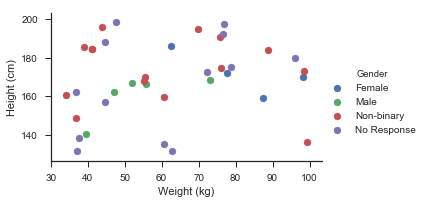

In [351]:
import seaborn
import numpy
import matplotlib.pyplot as pyplot

seaborn.set(style='ticks')

numpy.random.seed(0)
N = 37
_genders= ['Female', 'Male', 'Non-binary', 'No Response']
df = pd.DataFrame({
    'Height (cm)': numpy.random.uniform(low=130, high=200, size=N),
    'Weight (kg)': numpy.random.uniform(low=30, high=100, size=N),
    'Gender': numpy.random.choice(_genders, size=N)
})

fg = seaborn.FacetGrid(data=df, hue='Gender', hue_order=_genders, aspect=1.61)
fg.map(pyplot.scatter, 'Weight (kg)', 'Height (cm)').add_legend()


In [380]:
df_plot = df_plot.merge(color_df, on='media_id')
df_plot.index = df_plot['Nom']

In [ ]:
def autolabel(rects):
    # attach some text labels
        for ii,rect in enumerate(rects):

            width =  rect.get_width()

            height = rect.get_height()

            yloc1=rect.get_y() + height /2.0
            yloc2=rect.get_y() + height /2.0
            if (width <= 5):
                # Shift the text to the right side of the right edge
                xloc1 = width + 1
                yloc2=yloc2+0.3
                # Black against white background
                clr = 'black'
                align = 'left'
            else:
                # Shift the text to the left side of the right edge
                xloc1 = 0.98*width
                # White on blue
                clr = 'white'
                align = 'right'
            yloc1=rect.get_y() + height /2.0

            ax.text(xloc1,yloc1, '%s'% (count[ii]),horizontalalignment=align,
                             verticalalignment='center',color=clr,weight='bold',
                             clip_on=True)
            ax.text(5,yloc2, '%s'% (platform[ii]),horizontalalignment='left',
                             verticalalignment='center',color=clr,weight='bold',
                             clip_on=True)


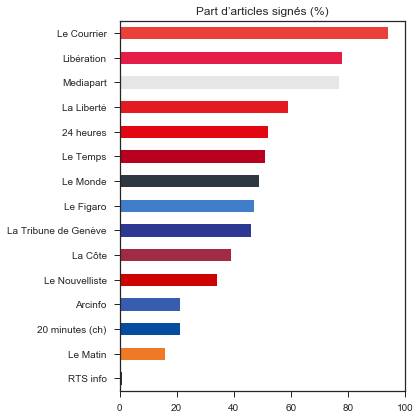

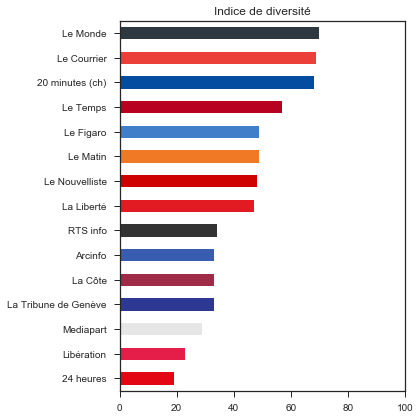

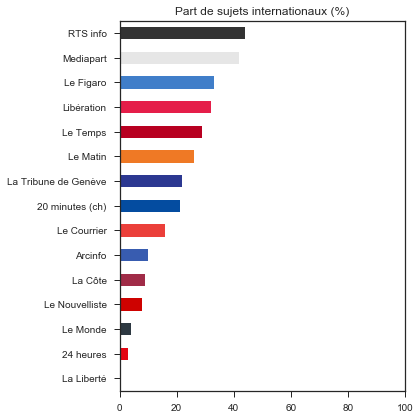

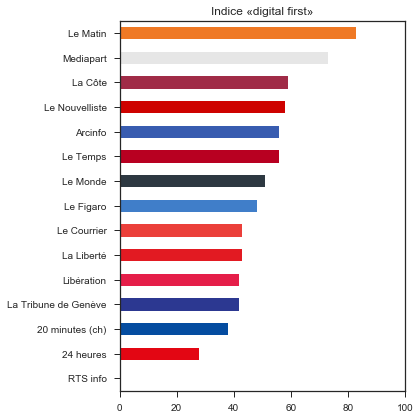

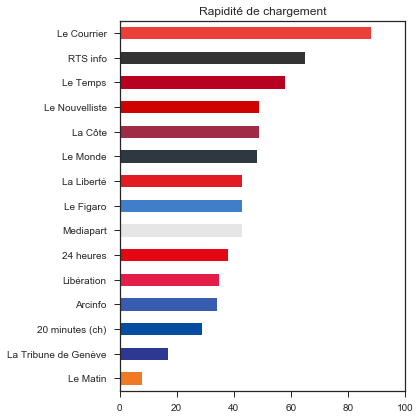

In [396]:
titles = ['Part d’articles signés (%)', 'Indice de diversité', 'Part de sujets internationaux (%)', 'Indice «digital first»', 'Rapidité de chargement']
i = 0

for col in ['signed', 'varied', 'international', 'digitalfirst',
       'fast']:

    sorted_df = df_plot.sort_values(col, ascending=True)
    #sorted_df[col].plot(kind='bar', title=col, color=sorted_df['color'].tolist(), figsize=(6, 6))
    
    sorted_df[col].plot(kind='barh', title=titles[i], color=sorted_df['color'].tolist(), figsize=(6, 6))
    plt.ylabel('')
    plt.xlim(0, 100)
    plt.tight_layout()
    plt.savefig('graph/{}.pdf'.format(col))
    plt.show()
    i += 1

In [367]:
color_df['color'].tolist()

['#2C3891',
 '#E30613',
 '#b80021',
 '#2d3841',
 '#333333',
 '#044CA0',
 '#EF7925',
 '#E6E6E6',
 '#407ec9',
 '#e51e49',
 '#a02b47',
 '#385cb0',
 '#ce0200',
 '#e21a22',
 '#eb3f3a']

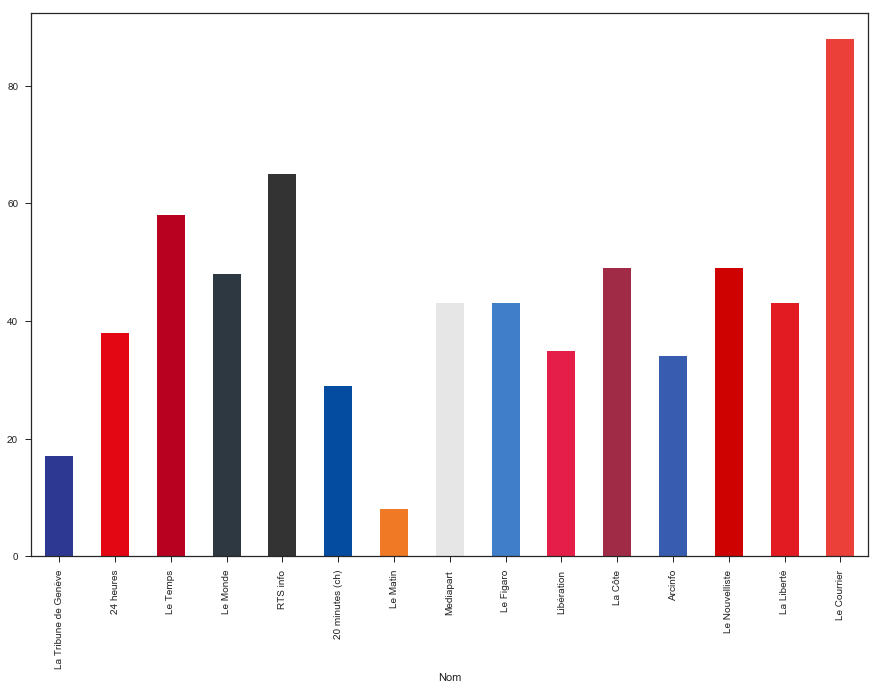

In [368]:
df_plot['fast'].plot(kind='bar', figsize=(15, 10), color=color_df['color'].tolist())

In [401]:
df

,Gender,Height (cm),Weight (kg)
0,Male,168.416945,73.185380
1,No Response,180.063256,96.062365
2,Female,172.193436,77.727421
3,Non-binary,168.141823,55.165553
4,Non-binary,159.655836,60.592237
5,No Response,175.212588,78.834184
6,Non-binary,160.631105,34.215783
7,No Response,192.424110,76.673670
8,No Response,197.456393,76.944651
9,No Response,156.840906,44.726779


In [432]:
heading_times

,minutes_day
heading,
Genève,24.0
International,16.0
Neuchâtel,5.0
Régions,5.0
Solidarité,20.0
Vaud,16.0
Écologie,7.0
autres,7.0


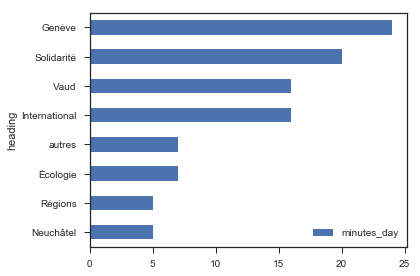

In [434]:
heading_times.sort_values('minutes_day').plot(kind='barh')
plt.tight_layout()
plt.savefig('graph/rubriques.pdf')

In [428]:
# Valeurs relatives
for media_id in medias['media_id'].tolist():
    # Heures
    theMedia = medias[medias['media_id'] == media_id]
    
    mediaSum = df[df['media_id'] == media_id]['minutes_day'].sum()
    #print(theMedia['Nom'].values[0], 'total:', mediaSum)
    heading_times = (round(100 * df[df['media_id'] == media_id].groupby('heading')['minutes_day'].sum() / mediaSum)).to_frame()
    heading_times = heading_times[heading_times['minutes_day'] >= 5].copy()
    
    others = 100 - heading_times[heading_times['minutes_day'] >= 5]['minutes_day'].sum()
    heading_times.loc['autres'] = {'minutes_day': others}
    print(heading_times.sort_values('minutes_day', ascending=False).head(5)['minutes_day'].sum())




95.0
100.0
81.0
84.0
97.0
85.0
100.0
100.0
89.0
100.0
100.0
100.0
85.0
95.0
83.0


In [321]:
dfm['timestamp'] = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')

In [322]:
today = datetime.datetime.now().strftime('%Y-%m-%d')
today

'2018-06-16'

In [323]:
dfm['loading_time'] = dfm['fully_loaded_time']

In [324]:
dfm.to_csv('df/media_results_{}.csv'.format(today), index=False)

In [263]:
for name, group in df[(df['time_start'].dt.hour > 7) & (df['time_start'].dt.hour < 24) & (df['editor'] == 1)].groupby('media'):
    morning = group[group.index.hour < 16]
    evening = group[group.index.hour >= 16]
    
    print(len(morning), len(evening), '>', len(morning) / len(group))

13 17 > 0.43333333333333335
10 16 > 0.38461538461538464
11 29 > 0.275
15 12 > 0.5555555555555556
29 20 > 0.5918367346938775
13 17 > 0.43333333333333335
30 32 > 0.4838709677419355
29 6 > 0.8285714285714286
53 51 > 0.5096153846153846
28 20 > 0.5833333333333334
45 35 > 0.5625
40 56 > 0.4166666666666667
22 8 > 0.7333333333333333
0 1 > 0.0
18 25 > 0.4186046511627907


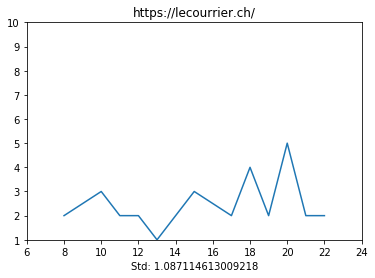

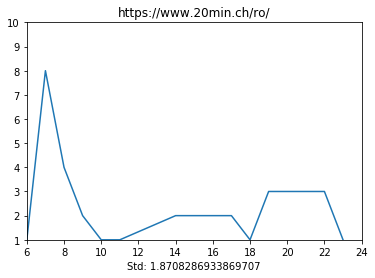

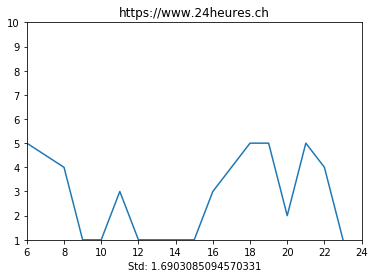

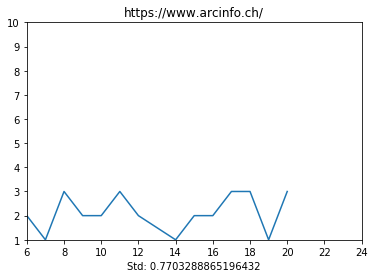

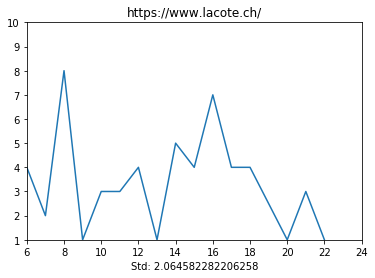

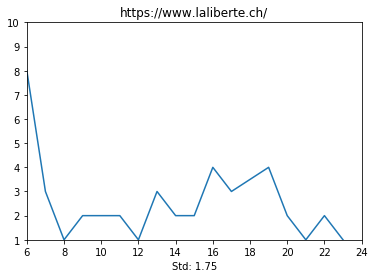

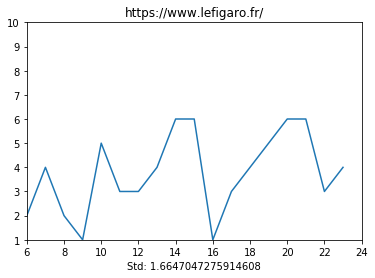

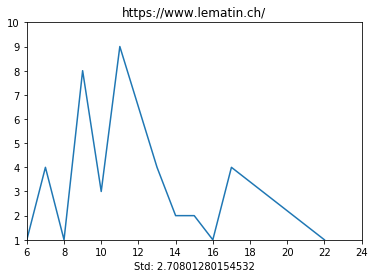

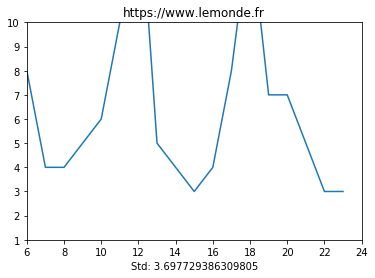

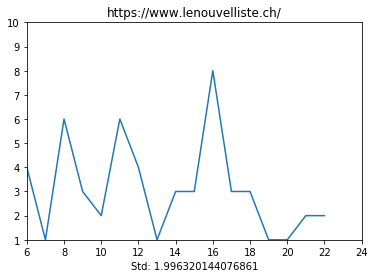

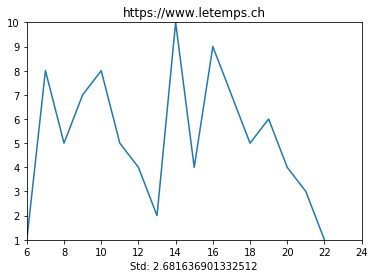

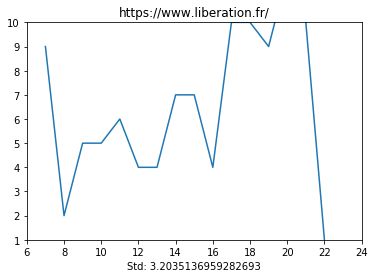

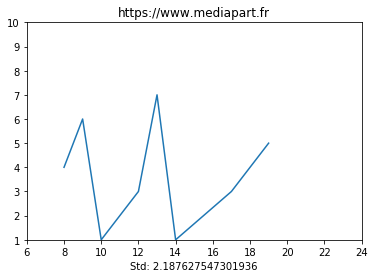

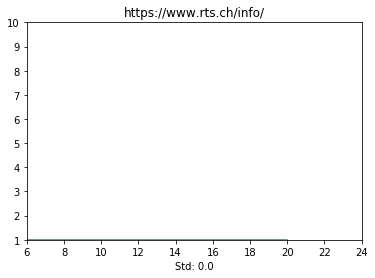

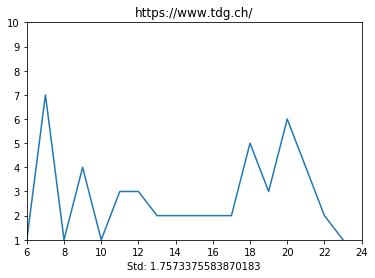

In [261]:
for name, group in df[(df['time_start'].dt.hour >= 6) & (df['time_start'].dt.hour <= 24) & (df['editor'] == 1)].groupby('media'):
    label = "Std: {}".format(group['time_start'].dt.hour.value_counts().std())
    group['time_start'].groupby(group.index.hour).count().plot(title=name)
    plt.xlim(6, 24)
    plt.ylim(1, 10)
    plt.xlabel(label)
    plt.show()


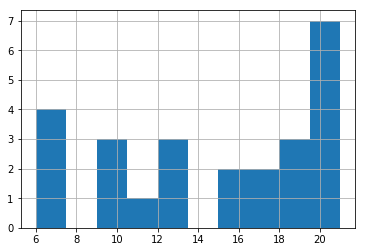

In [22]:
# Tribune de Genève
group = df[(df['media_id'] == 19) & (df['editor'] == 1)]
group['time_start'].dt.hour.hist()

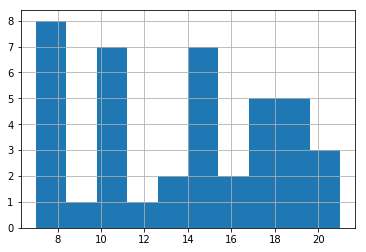

In [32]:
# Le Temps
group = df[(df['media_id'] == 21) & (df['editor'] == 1)]
group['time_start'].dt.hour.hist()

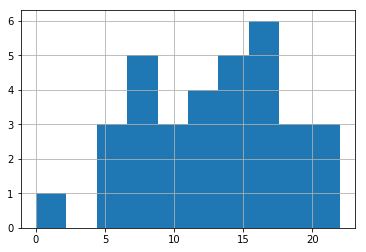

In [36]:
# 
group = df[(df['media_id'] == 29) & (df['editor'] == 1)]
group['time_start'].dt.hour.hist()

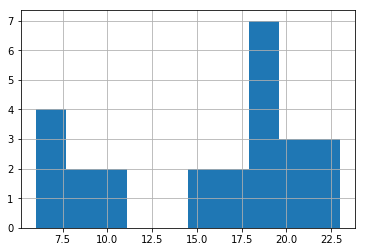

In [33]:
# 
group = df[(df['media_id'] == 20) & (df['editor'] == 1)]
group['time_start'].dt.hour.hist()

In [ ]:
def getVariedRatio(_group):
    return

In [ ]:
df[df['editor'] == 1].shape

In [345]:
dfm.loc[6]['report_url']

'https://gtmetrix.com/reports/www.lematin.ch/vbMQk96B'

In [ ]:
gtmetrix = pd.read_csv('df_ps.csv', usecols=['media_id', 'pagespeed_score', 'page_load_time'])

In [ ]:
medias.merge(gtmetrix, on='media_id')

In [ ]:
medias

In [ ]:
gtmetrix